In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:


# Generate synthetic data for illustration purposes
np.random.seed(42)

# Generate demographic data
n_samples = 1000
age = np.random.normal(loc=30, scale=10, size=n_samples)
income = np.random.normal(loc=50000, scale=20000, size=n_samples)
gender = np.random.choice(['Male', 'Female'], size=n_samples)

# Generate purchase history data
total_orders = np.random.randint(1, 20, size=n_samples)
avg_order_value = np.random.normal(loc=100, scale=20, size=n_samples)
purchase_frequency = np.random.normal(loc=0.5, scale=0.1, size=n_samples)

# Generate website interaction data
time_on_website = np.random.normal(loc=10, scale=5, size=n_samples)
products_viewed = np.random.randint(1, 50, size=n_samples)
website_visits = np.random.randint(1, 30, size=n_samples)

# Generate customer service interaction data
customer_service_calls = np.random.randint(0, 5, size=n_samples)
resolution_time = np.random.normal(loc=2, scale=1, size=n_samples)

# Generate feedback and churn status
customer_ratings = np.random.randint(1, 6, size=n_samples)
customer_reviews = np.random.choice(['Positive', 'Neutral', 'Negative'], size=n_samples)
churn_status = np.random.choice([0, 1], size=n_samples)

In [3]:

# Create a DataFrame
data = pd.DataFrame({
    'Age': age,
    'Income': income,
    'Gender': gender,
    'TotalOrders': total_orders,
    'AvgOrderValue': avg_order_value,
    'PurchaseFrequency': purchase_frequency,
    'TimeOnWebsite': time_on_website,
    'ProductsViewed': products_viewed,
    'WebsiteVisits': website_visits,
    'ServiceCalls': customer_service_calls,
    'ResolutionTime': resolution_time,
    'CustomerRatings': customer_ratings,
    'CustomerReviews': customer_reviews,
    'ChurnStatus': churn_status
})

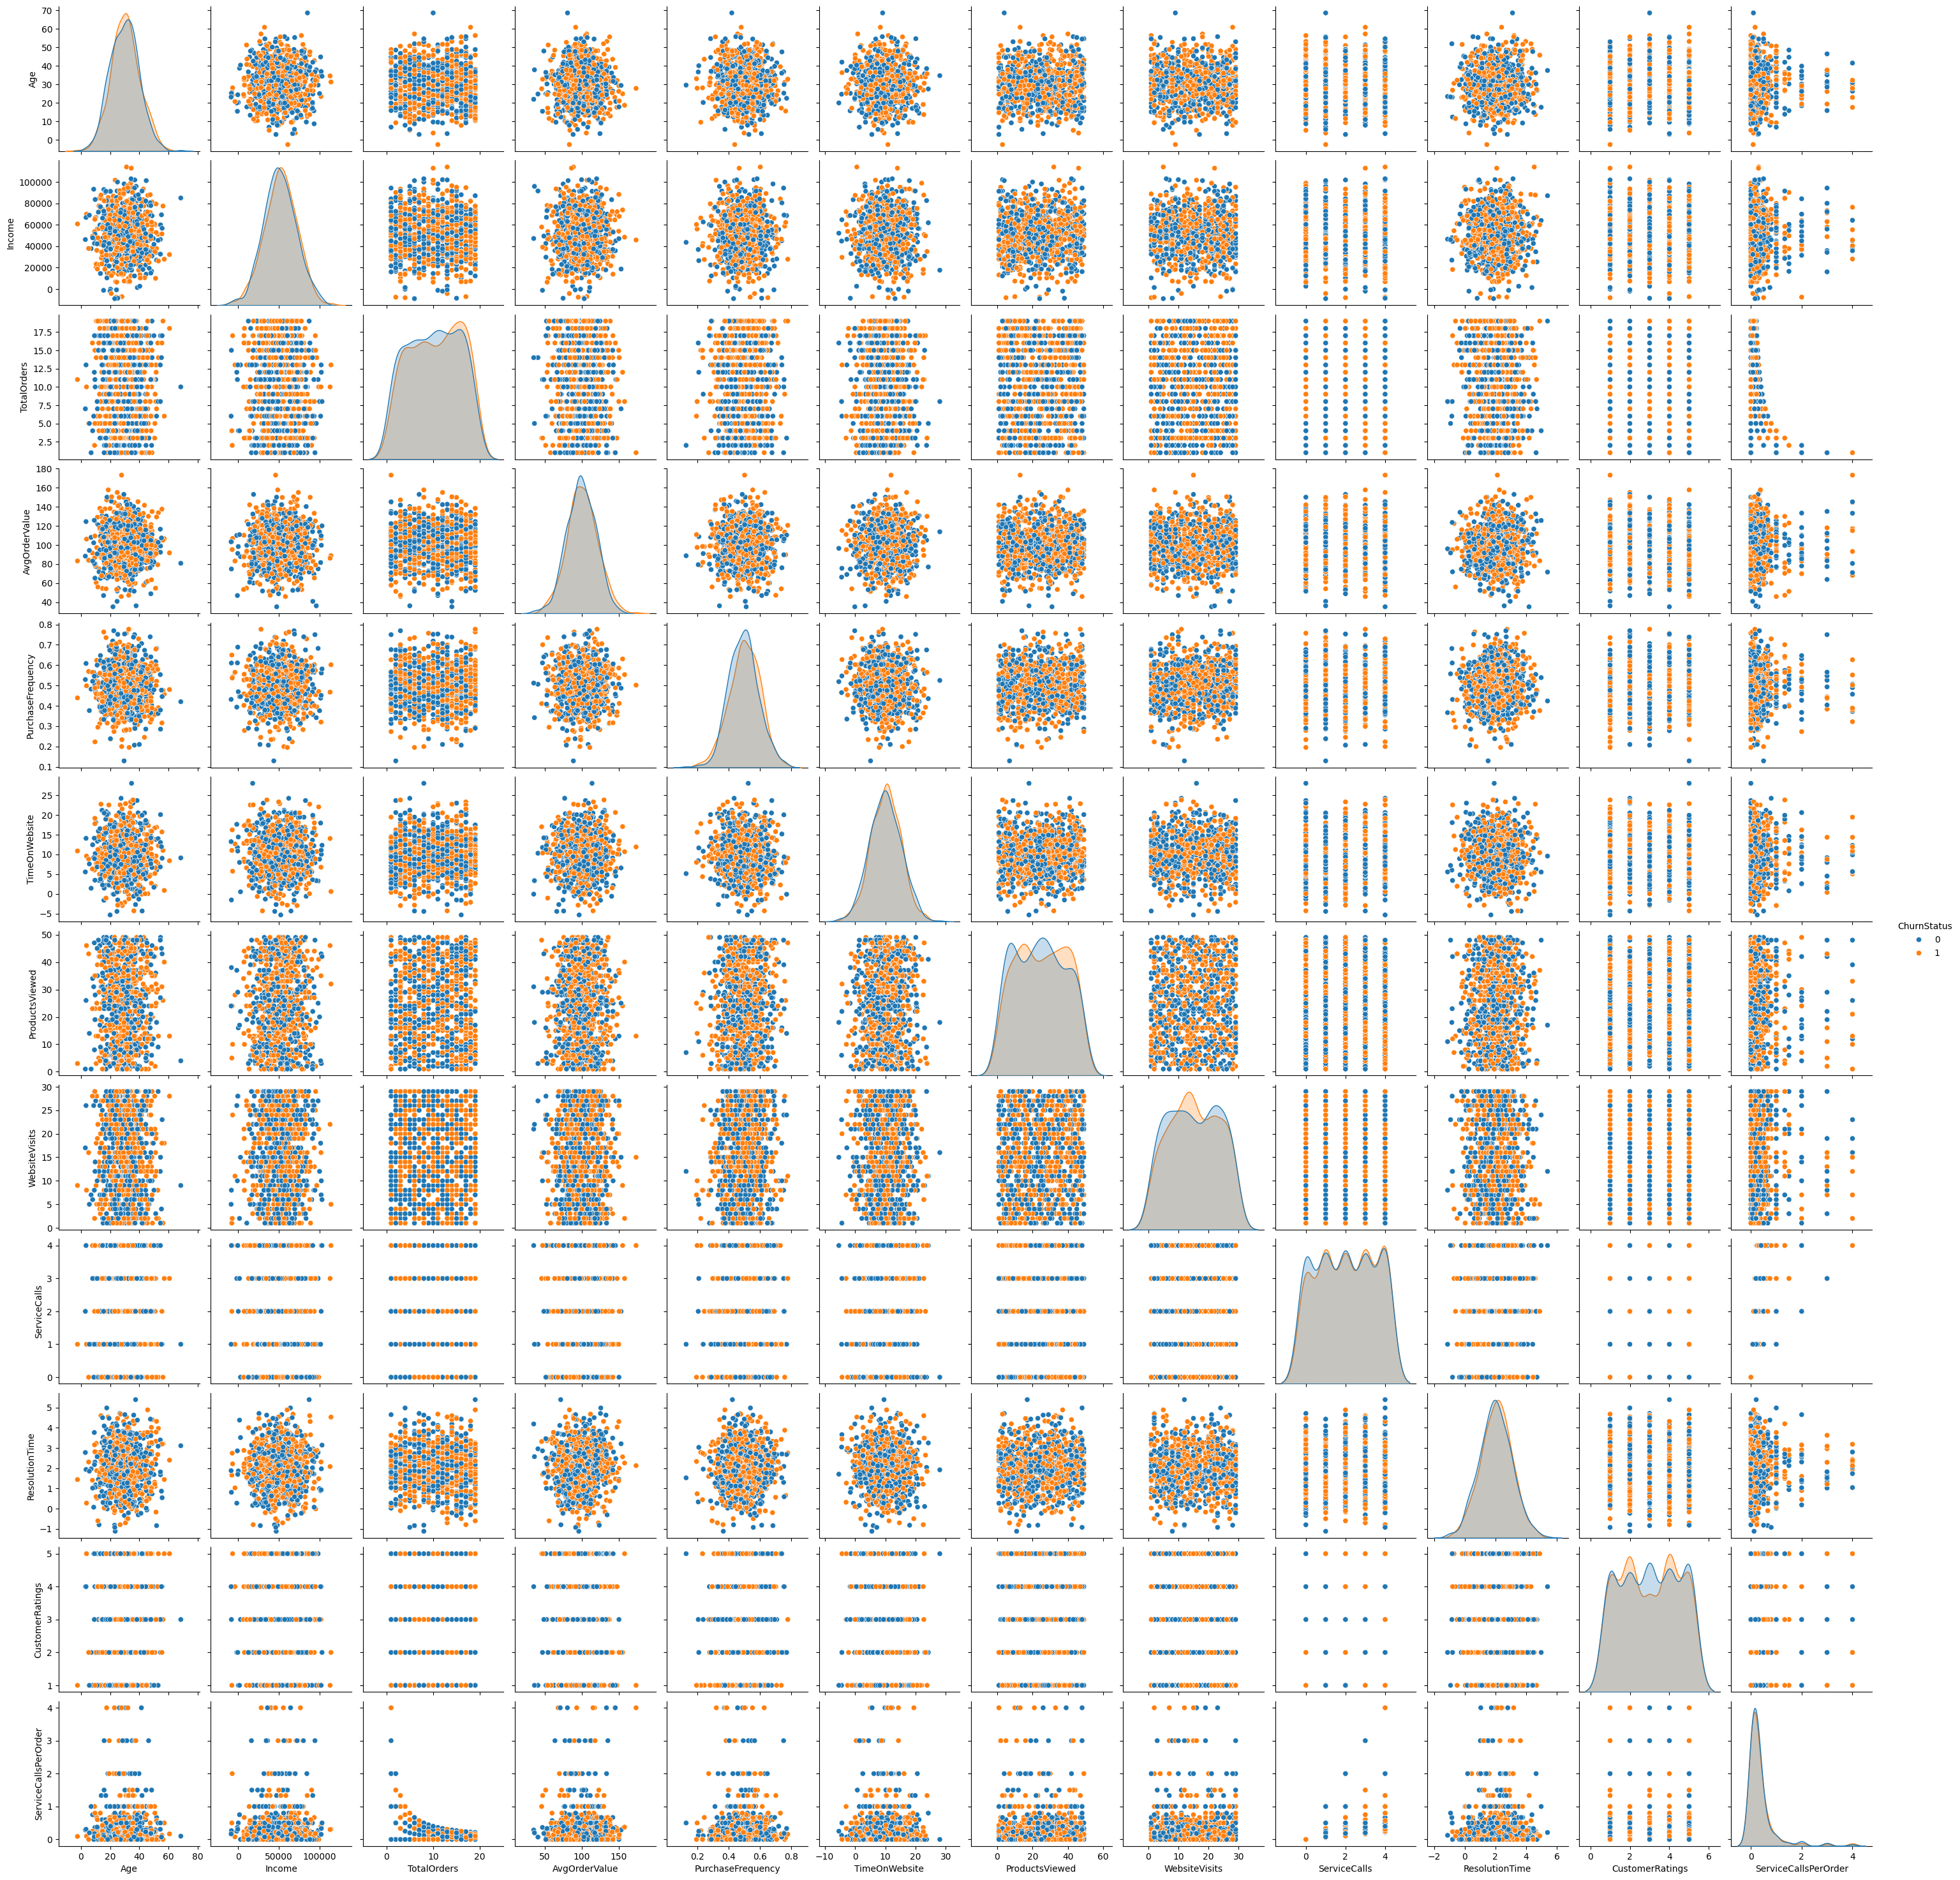

In [4]:

# Feature engineering
data['ServiceCallsPerOrder'] = data['ServiceCalls'] / data['TotalOrders']

# Exploratory Data Analysis (EDA)
sns.pairplot(data, hue='ChurnStatus', diag_kind='kde')
plt.show()

In [7]:
# Statistical Analysis
# For simplicity, let's use t-tests for numerical variables and chi-square test for categorical variables.
# In a real-world scenario, you might need more sophisticated tests and account for assumptions.



numerical_features = ['Age', 'Income', 'TotalOrders', 'AvgOrderValue', 'PurchaseFrequency',
                       'TimeOnWebsite', 'ProductsViewed', 'WebsiteVisits', 'ResolutionTime', 'ServiceCallsPerOrder']

categorical_features = ['Gender', 'CustomerReviews']

for feature in numerical_features:
    print(f"\nStatistical analysis for {feature}:")
    print(data.groupby('ChurnStatus')[feature].describe())
    t_stat, p_value = stats.ttest_ind(data[data['ChurnStatus'] == 0][feature], data[data['ChurnStatus'] == 1][feature])
    print(f'T-statistic: {t_stat}, p-value: {p_value}')


Statistical analysis for Age:
             count       mean       std       min        25%        50%  \
ChurnStatus                                                               
0            505.0  29.826202  9.761239  3.031134  22.856486  30.052437   
1            495.0  30.567856  9.819317 -2.412673  24.168717  30.642800   

                   75%        max  
ChurnStatus                        
0            36.408429  68.527315  
1            36.507962  60.788808  
T-statistic: -1.1977479774634605, p-value: 0.23129952988784

Statistical analysis for Income:
             count          mean           std          min           25%  \
ChurnStatus                                                                 
0            505.0  50939.491730  19912.074833 -8807.772693  37465.655508   
1            495.0  51903.598831  19995.163910 -7925.107564  38913.224987   

                      50%           75%            max  
ChurnStatus                                             
0      

In [8]:
for feature in categorical_features:
    contingency_table = pd.crosstab(data[feature], data['ChurnStatus'])
    chi2_stat, p_value, _, _ = stats.chi2_contingency(contingency_table)
    print(f"\nChi-square test for {feature}:")
    print(f'Chi2 statistic: {chi2_stat}, p-value: {p_value}')



Chi-square test for Gender:
Chi2 statistic: 0.39223610236173495, p-value: 0.5311263472370845

Chi-square test for CustomerReviews:
Chi2 statistic: 0.2806025244606822, p-value: 0.8690963700448952



Model Evaluation:
Accuracy: 0.515
              precision    recall  f1-score   support

           0       0.51      0.57      0.54       100
           1       0.52      0.46      0.49       100

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.52      0.52      0.51       200



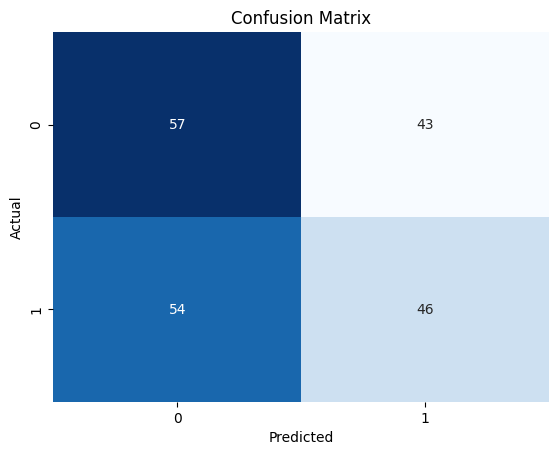

In [9]:

# Data preprocessing
X = data.drop('ChurnStatus', axis=1)
y = data['ChurnStatus']
X_encoded = pd.get_dummies(X, columns=['Gender', 'CustomerReviews'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Build a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model evaluation
print("\nModel Evaluation:")
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
